<br>
<h1 style="font-family:sans-serif; text-align:center"> 
<!--     <span style='color: pink'> Twitter analysis of </span> -->
    <span style='color: white; font-size:50%; text-shadow: 0px 0px 15px black'> Twitter analysis of </span>
<!--     <span style='color:#00acee'> Twitter analysis of </span> -->
<!--     <span style="-webkit-text-stroke"> Twitter analysis of</span> -->
<!--     <span class="hr3" style='color:#e40843; letter-spacing: 4px; font-size:105%'> Canada</span> -->
    <span class="hr3" style='color:#e40843; font-size:60%; text-shadow: 0px 0px 30px pink'>Canada </span> <span class="hr3" style='color:gray; font-size:50%; text-shadow: 0px 0px 30px pink'>response to Covid-19</span><br>
</h1>

# EDA

The aim of this notebook is to make Exploratory Data Analysis (EDA) of retrieved tweets using **snscrape**, from March 1st to April 30th (2020), in order to analyze the difference in sentiment analysis of tweets from people befor and after Trudeau's [announcement of government policies facing impact of Covid-19](https://www.youtube.com/watch?v=1o-tV0A87l8&feature=youtu.be) to support small businesses and their employees.


_Authors: [cuspime](https://github.com/cuspime) and [vcuspinera](https://github.com/vcuspinera)._

## Import libraries

In [1]:
# General libraries
import pandas as pd
import numpy as np
import os
import time
from datetime import datetime, timedelta, date
from pytz import timezone
import altair as alt
import json

# Preprocess libraries
import re
import spacy
import string
import en_core_web_sm
nlp = en_core_web_sm.load()

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Parameters

In [2]:
# dates
today = datetime.now()
init = date.fromisoformat('2020-03-01')

my_dates = list()
for d in range(0, 61, 1):
# for d in range(0, 1, 1):
    aux = init + timedelta(days=d)
    my_dates.append(aux)

# twitter accounts
accounts = ('JustinTrudeau', 'CanadianPM', 'Canada', 'GovCanHealth')

# max number of results
max_results = 100_000

#folder to save information
my_folder = "../tweets/"

## Open `json` file with all tweets

In [3]:
%%time

# Open the file
df_tot = pd.read_json(my_folder + 'tweets_db.json')

CPU times: user 48.4 s, sys: 13.3 s, total: 1min 1s
Wall time: 1min 4s


## Basic analysis

In [4]:
# A first view of the data frame
df_tot.tail(3)

,account,date,content,replyCount,retweetCount,likeCount,quoteCount,lang,sourceLabel,username,followersCount,friendsCount,location
3503872,JustinTrudeau,2020-04-30 00:00:19,@RCAF_ARC @CFSnowbirds @CanadianForces @CFOper...,1,0,0,0,en,Twitter for iPhone,pffoote,356,1531,"St. John's, NL, Canada"
3503873,JustinTrudeau,2020-04-30 00:00:18,@narendramodi @JustinTrudeau WHO बौना होगा अगर...,0,0,0,0,hi,Twitter for Android,chandan24513630,1,40,
3503874,JustinTrudeau,2020-04-30 00:00:08,@CBCNews @CTVNews @JustinTrudeau @celliottabil...,0,0,0,0,en,Twitter Web App,DavidCBarron,231,331,Brampton Ontario


In [5]:
# number of tweets
len(df_tot)

3503875

In [6]:
# Check if it contains the rigth tweets
%time df_tot.groupby(['account']).count()

CPU times: user 1.56 s, sys: 105 ms, total: 1.66 s
Wall time: 1.66 s


,date,content,replyCount,retweetCount,likeCount,quoteCount,lang,sourceLabel,username,followersCount,friendsCount,location
account,,,,,,,,,,,,
Canada,2711168,2711168,2711168,2711168,2711168,2711168,2711168,2711153,2711168,2711168,2711168,2711168
CanadianPM,35495,35495,35495,35495,35495,35495,35495,35495,35495,35495,35495,35495
GovCanHealth,24549,24549,24549,24549,24549,24549,24549,24549,24549,24549,24549,24549
JustinTrudeau,732663,732663,732663,732663,732663,732663,732663,732663,732663,732663,732663,732663


In [7]:
df_tot.describe()

,replyCount,retweetCount,likeCount,quoteCount,followersCount,friendsCount
count,3.503875e+06,3.503875e+06,3.503875e+06,3.503875e+06,3.503875e+06,3.503875e+06
mean,7.788797e-01,2.055384e+00,7.387272e+00,2.483151e-01,1.964345e+04,1.606954e+03
std,1.424193e+01,9.179367e+01,3.873542e+02,1.508036e+01,4.094871e+05,7.620145e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.900000e+01,1.710000e+02
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.550000e+02,5.230000e+02
75%,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.835000e+03,1.450000e+03
max,7.498000e+03,9.977500e+04,4.676340e+05,1.500900e+04,8.380480e+07,1.441770e+06


In [8]:
# See the number of unique terms per each variable
df_tot.nunique()

account                 4
date              2338472
content           3306846
replyCount            681
retweetCount         1391
likeCount            2759
quoteCount            444
lang                   62
sourceLabel          6264
username          1069132
followersCount      65596
friendsCount        21186
location           223513
dtype: int64

In [9]:
# tweets by `Account`
print("Number of tweets by Account:\n")
pd.DataFrame(df_tot['account'].value_counts())

Number of tweets by Account:



,account
Canada,2711168
JustinTrudeau,732663
CanadianPM,35495
GovCanHealth,24549


In [10]:
# tweets by `language`
languages_twitter = pd.read_csv(my_folder + "twitter_supported_languages.csv", skiprows=5)
languages_twitter

print("Number of tweets by Languages:")
print("  -- the most used ones --\n")
data_langs = pd.DataFrame(df_tot['lang'].value_counts().head()).\
            reset_index().rename(columns={'index':'Language_code', 'lang':'tweets'})

# languages_twitter
pd.merge(languages_twitter, data_langs, how="right", on=["Language_code", "Language_code"])


Number of tweets by Languages:
  -- the most used ones --



,Language_code,Name,tweets
0,en,English (default),2915145
1,es,Spanish,212901
2,fr,French,135014
3,und,NaN,91355
4,pt,Portuguese,48713


## EDA Plots

In [11]:
%%time

# add column with day
df_tot['day'] = [df_tot['date'][i].strftime("%Y-%m-%d") for i in range(len(df_tot))]

CPU times: user 1min 25s, sys: 68.4 ms, total: 1min 25s
Wall time: 1min 25s


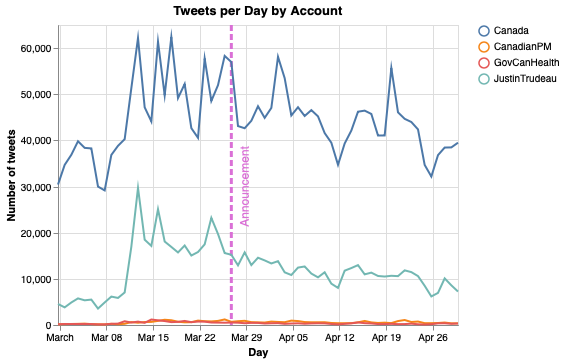

In [12]:
# tweets per day by account

alt.renderers.enable('mimetype')


df_aux = pd.DataFrame(df_tot.groupby(['account', 'day'])['content'].count()).reset_index()

base = alt.Chart(df_aux)

lines = base.mark_line().encode(
    x = alt.X('day:T', title="Day"),
    y = alt.Y('content:Q', title="Number of tweets"),
    color = alt.Color('account')#, title="Account")
).properties(
    title='Tweets per Day by Account'
)

rule = alt.Chart(pd.DataFrame({
    'day': ['2020-03-27'],
    'color': ['orchid']
})).mark_rule(size=3, strokeDash=[6,3]).encode(
  x='day:T',
  color=alt.Color('color:N', scale=None, title = "")
)

text = alt.Chart(pd.DataFrame({
    'day': ['2020-03-29'],
    'color': ['orchid'],
    'y': [30000]
})).mark_text(
    text='Announcement', angle=270, size=12
).encode(
    x='day:T', y='y',
    color=alt.Color('color:N', scale=None, title = "")
)

rule + lines + text

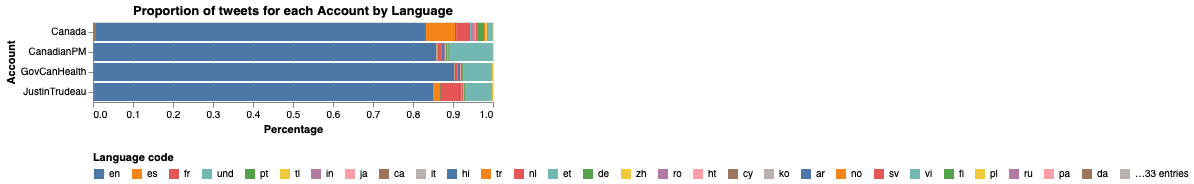

In [13]:
df_aux = pd.DataFrame(df_tot.groupby(['account', 'lang'])['content'].count()).reset_index()
sort_lang = pd.DataFrame(df_aux.groupby(['lang'])['content'].sum()).reset_index().sort_values(by=['content'], ascending=False).reset_index()['lang']


alt.Chart(df_aux).mark_bar().encode(
    x=alt.X('sum(content)', stack="normalize", title="Percentage"),
    y=alt.Y('account', title="Account"),
    color=alt.Color('lang', sort=sort_lang.to_list(), title="Language code", legend=alt.Legend(orient="bottom")),
    tooltip=['account' , 'lang']
).properties(
    title='Proportion of tweets for each Account by Language'
)


